In [30]:
from __future__ import print_function

import numpy as np
import operator
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# the histogram of the data
mpl.rcParams['font.size'] = 20.0
%matplotlib inline

BASE_PATH = "/home/dsavenk/"
LIVEQA_DATA_PATH = BASE_PATH + "data/liveqa/"
LIVEQA_RESULTS_DATA_PATH = LIVEQA_DATA_PATH + "results_15/"
JUDGED_RESULTS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-Out-of-mEmory"
ANSWERS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-answers"
QIDS_FILE = LIVEQA_DATA_PATH + "liveqa15-trec-qid.txt"
QUESTIONS_FILE = LIVEQA_DATA_PATH + "liveqa15-trec-qna.txt"

In [31]:
import csv

def read_tsv_file(file_path, key_field_extractor, restkey="NONE"):
    answers = dict()
    with open(file_path, 'r') as input_file:
        input_tsv = csv.DictReader(input_file, delimiter='\t', restkey=restkey)
        for row in input_tsv:
            answers[key_field_extractor(row)] = row
    return answers

def read_judged_results_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"])

def read_answers_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"][3:])

def get_ya_web_scores(judged_results, answers):
    scores = {"ya": [], "web": [], "idon'tknow": []}
    for qid, result in judged_results.iteritems():
        answer = answers[qid]
        url = answer["RESOURCES"]
        is_yahoo_answers = "ya" if "answers.yahoo.com" in url else "web" if url else "idon'tknow"
        scores[is_yahoo_answers].append(int(result["SCORE"]))
    return scores

def read_questions_file(file_path):
    res = read_tsv_file(file_path, lambda row: row["QID"], restkey="ANSWERS")
    del res['']
    return res

def read_qids_file(file_path):
    with open(file_path, 'r') as input:
        return map(str.strip, input.readlines())

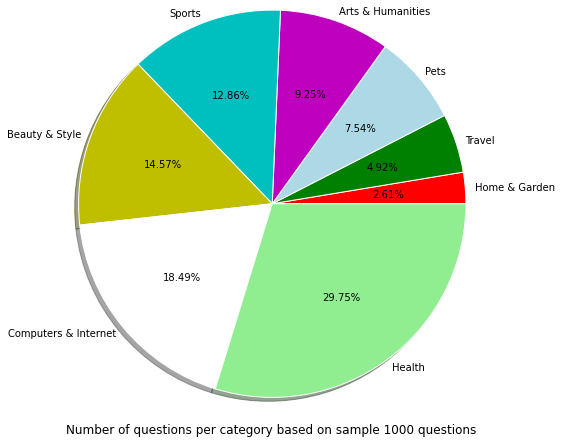

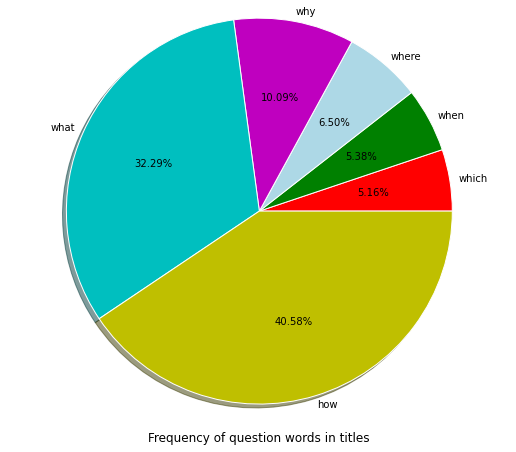

In [32]:
# Drawing pie chart
import matplotlib.pyplot as plt

def plot_pie_chart(sizes, labels, title="", remove_small=False, small_percent=0.01, angle=90):
    if remove_small:
        new_sizes = []
        new_labels = []
        other_size = 0
        total = sum(sizes)
        for size, label in zip(sizes, labels):
            if 1.0 * size / total <= small_percent:
                other_size += size
            else:
                new_sizes.append(size)
                new_labels.append(label)
        new_sizes.append(other_size)
        new_labels.append("Other")
        sizes = new_sizes
        labels = new_labels
    sizes, labels = zip(*sorted(zip(sizes, labels), key=operator.itemgetter(0)))
    
    #cmap = plt.cm.prism
    #colors = cmap(np.linspace(0., 1., len(labels)))
    colors = ['r', 'g', 'lightblue', 'm', 'c', 'y', 'w', 'lightgreen', 'crimson', 'b']
    plt.figure(figsize=(9, 7))
    pie_wedge_collection = plt.pie(sizes, colors=colors, labels=labels, autopct='%1.2f%%', shadow=True, startangle=angle, labeldistance=1.05)
    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
    plt.axis('equal')
    plt.title(title, y=-0.1)
    plt.show()

test_nums = {"Arts & Humanities": 92, "Beauty & Style": 145, "Computers & Internet": 184, "Health": 296, "Home & Garden": 26, "Pets": 75, "Sports": 128, "Travel": 49}
plot_pie_chart(test_nums.values(), test_nums.keys(), angle=0, title="Number of questions per category based on sample 1000 questions")

qw = {"what": 144, "when": 24, "where": 29, "how": 181, "why":45, "which":23}
plot_pie_chart(qw.values(), qw.keys(), angle=0, title="Frequency of question words in titles")

In [33]:
judged_results = read_judged_results_file(JUDGED_RESULTS_FILE)
answers = read_answers_file(ANSWERS_FILE)
questions = read_questions_file(QUESTIONS_FILE)
qids = read_qids_file(QIDS_FILE)
scores = get_ya_web_scores(judged_results, answers)


# Answer statistics

# Number of answers
Yahoo!Answers: 513	Web:340	No answer:31


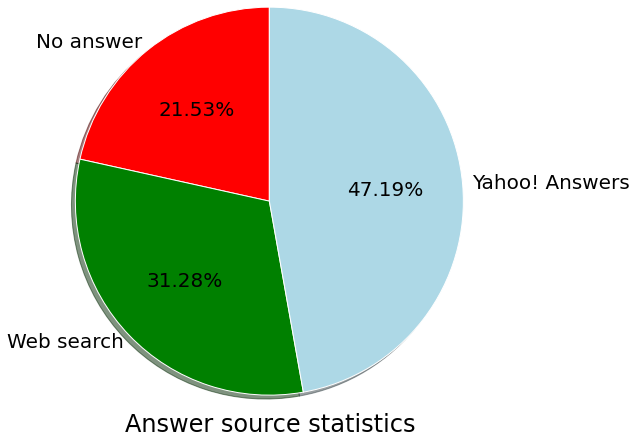

# Average score:
Yahoo!Answers: 1.95712	Web:1.50000
# Number of answers with score > 2
Yahoo!Answers: 153	Web:53


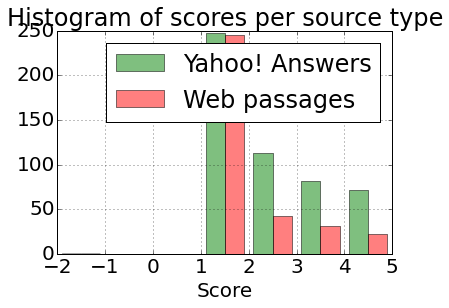

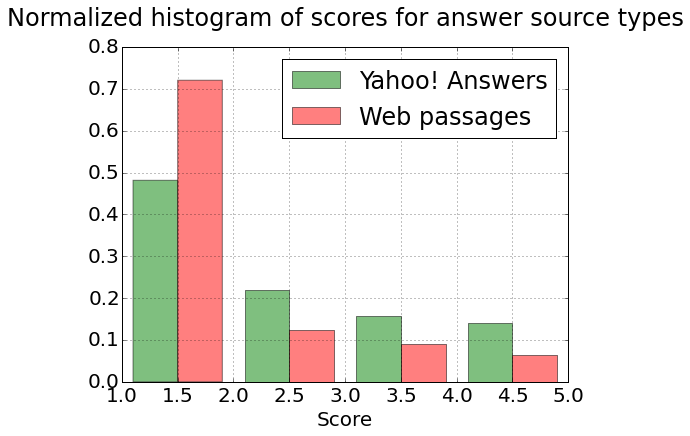

In [34]:
print("# Number of answers\nYahoo!Answers: %d\tWeb:%d\tNo answer:%d" % (len(scores["ya"]), len(scores["web"]), len(scores["idon'tknow"])))

mpl.rcParams['font.size'] = 20.0
plot_pie_chart([len(scores["ya"]), len(scores["web"]), 1087 - len(scores["ya"]) - len(scores["web"])], ["Yahoo! Answers", "Web search", "No answer"], angle=90, title="Answer source statistics")

print("# Average score:\nYahoo!Answers: %.5f\tWeb:%.5f" % (1.0 * sum(scores["ya"]) / len(scores["ya"]), 1.0 * sum(scores["web"]) / len(scores["web"])))
print("# Number of answers with score > 2\nYahoo!Answers: %d\tWeb:%d" % (len([score for score in scores["ya"] if score > 2]), len([score for score in scores["web"] if score > 2])))

plt.hist((scores["ya"], scores["web"]), bins=range(-2, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Histogram of scores per source type')
plt.legend()
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.hist((scores["ya"], scores["web"]), normed=True, bins=range(1, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Normalized histogram of scores for answer source types', y=1.05)
plt.legend()
plt.grid(True)

plt.show()

('answers.yahoo.com', [509, [2, 4, 4, 2, 4, 4, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 4, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 4, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 1, 3, 2, 4, 4, 1, 1, 3, 1, 4, 4, 2, 4, 2, 3, 4, 3, 1, 4, 1, 1, 2, 2, 1, 4, 2, 3, 3, 1, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 4, 4, 1, 1, 2, 3, 3, 1, 4, 1, 4, 2, 1, 1, 1, 2, 1, 2, 3, 4, 1, 4, 1, 4, 3, 3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 4, 4, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 4, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 4, 3, 1, 3, 1, 2, 2, 4, 3, 3, 1, 1, 3, 1, 2, 2, 4, 2, 1, 1, 4, 1, 2, 4, 1, 4, 2, 4, 1, 2, 1, 4, 2, 1, 1, 4, 1, 3, 2, 4, 1, 1, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3, 2, 1, 4, 1, 3, 4, 2, 1, 3, 4, 2, 4, 1, 1, 4, 1, 1, 3, 1, 2, 1, 2, 2, 1, 4, 1, 1, 2, 2, 3, 2, 4, 1, 2, 2, 4, 3, 1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1,

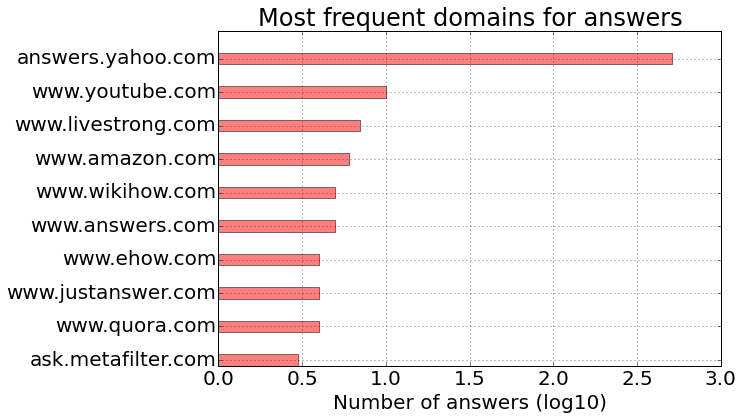

In [35]:
import operator
answers_by_domain = dict()
for qid, result in judged_results.iteritems():
    answer = answers[qid]
    url = answer["RESOURCES"]
    if url:
        start = url.find("://")
        end = url.find("/", start + 3)
        if end == -1:
            end = len(url) 
        domain = url[start + 3:end]
        if domain not in answers_by_domain:
            answers_by_domain[domain] = [0, []]
        answers_by_domain[domain][0] += 1
        answers_by_domain[domain][1].append(int(result["SCORE"]))
domains = sorted(answers_by_domain.items(), key=operator.itemgetter(1), reverse=True)
print("\n".join(map(str, domains[:20])))

from math import log10
vals = [log10(rec[1][0]) for rec in domains][:10]
names = [rec[0] for rec in domains][:10]

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
average_bars = ax.barh(ind, vals[::-1], width, color='r', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_xlabel('Number of answers (log10)')
plt.yticks(ind + 0.5*width, names[::-1], rotation=0, fontsize=20)
plt.grid(True)
plt.title("Most frequent domains for answers")
plt.show()

# Question statistics

Questions total: 1087
Questions downloaded: 856
[('--->> Tips---> https://tr.im/2and3linkk', 10), ('No.', 10), ('yes', 9), ('No', 9), ('read below https://tr.im/firstansbest green links for reference', 7), ('details here...see the2nd and 3rd green https://tr.im/bestfirstsite', 6), ('--->> Tips---> https://tr.im/firstbestlink', 5), ('no', 5), ('Read all >> https://tr.im/bestansfirst check the 1st and 2nd green linkz>>>>', 5), ('rread about it below https://tr.im/greensitesss see >>>> the 1st and 2nd green website for details on top', 5)]
Categories frequency:
[('Health', 264), ('Computers & Internet', 131), ('Sports', 94), ('Beauty & Style', 93), ('Arts & Humanities', 92), ('Pets', 80), ('Travel', 47), ('Home & Garden', 45), ('Politics & Government', 2), ('Society & Culture', 2), ('Family & Relationships', 1), ('Games & Recreation', 1), ('Local Businesses', 1), ('Cars & Transportation', 1), ('Yahoo Products', 1), ('Social Science', 1)]


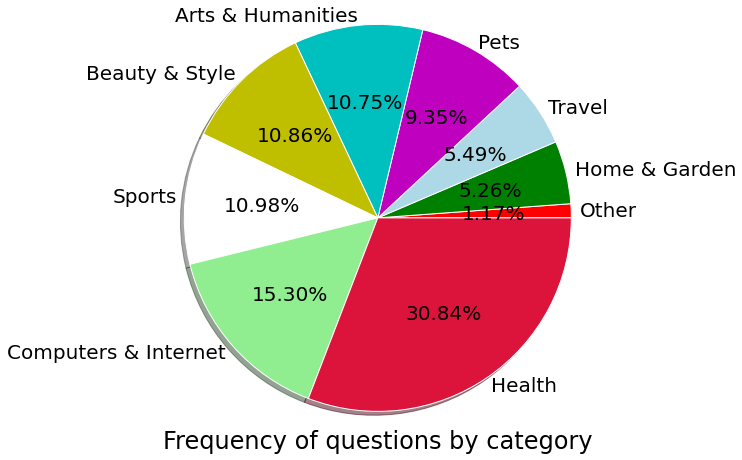

Subcategories frequency:
[('Diet & Fitness', 62), ('Diseases & Conditions', 40), ('Internet', 37), ('Dogs', 37), ("Women's Health", 36), ('Fashion & Accessories', 34), ('Hardware', 34), ('Software', 32), ("Men's Health", 31), ('Books & Authors', 30), ('History', 29), ('Hair', 28), ('Mental Health', 27), ('General Health Care', 25), ('Dental', 21), ('Cats', 17), ('Maintenance & Repairs', 16), ('Asia Pacific', 16), ('Visual Arts', 15), ('Skin & Body', 15), ('Other - Health', 14), ('Fantasy Sports', 13), ('Wrestling', 13), ('Baseball', 13), ('Cleaning & Laundry', 12), ('Football (American)', 12), ('Programming & Design', 12), ('United States', 10), ('Other - Beauty & Style', 8), ('Makeup', 8), ('Running', 8), ('Computer Networking', 8), ('Optical', 7), ('Outdoor Recreation', 7), ('Rodents', 6), ('Fish', 6), ('Garden & Landscape', 6), ('Philosophy', 5), ('Security', 5), ('Other - Pets', 5), ('Birds', 5), ('Theater & Acting', 4), ('Do It Yourself (DIY)', 4), ('Volleyball', 4), ('Africa & Mi

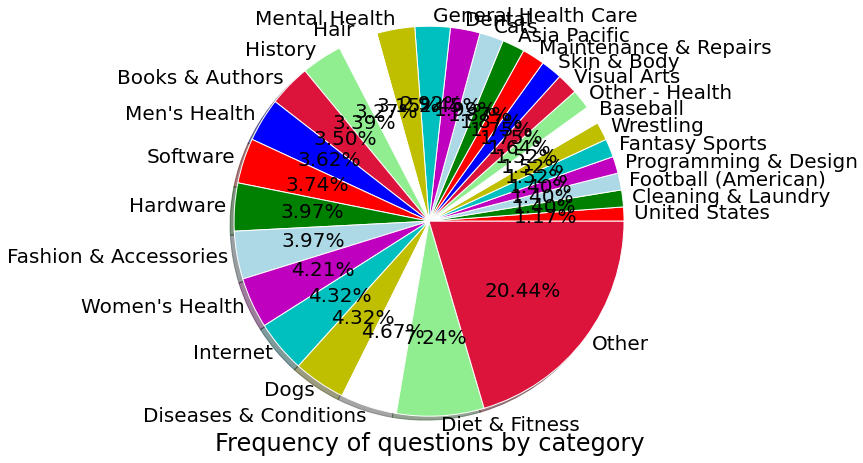

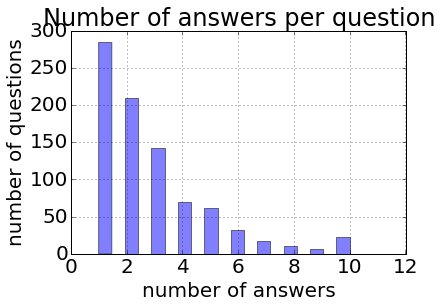

In [36]:
print("Questions total: %d" % len(qids))
print("Questions downloaded: %d" % len(questions.keys()))

questions_by_category = dict()
questions_by_subcategory = dict()
has_best_answer = 0
has_answer = 0
no_answer = 0
answers_per_question = []

answers_frequency = dict()

for question in questions.itervalues():
    categories = question["CATEGORY"].split(',')
    question["ANSWERS"] = filter(lambda answer : answer, question["ANSWERS"])
    category = categories[0]
    subcategory = categories[1] if len(categories) > 1 else categories[0]
    if question["BEST_ANSWER"]:
        has_best_answer += 1 
        has_answer += 1
    elif len(question["ANSWERS"]) > 0:
        has_answer += 1
    else:
        no_answer += 1
    answers_per_question.append(len(question["ANSWERS"]) + (1 if question["BEST_ANSWER"] else 0))
    
    for answer in question["ANSWERS"] + ([question["BEST_ANSWER"],] if question["BEST_ANSWER"] else []):
        if answer not in answers_frequency:
            answers_frequency[answer] = 0
        answers_frequency[answer] += 1
    
    if category not in questions_by_category:
        questions_by_category[category] = 0
    questions_by_category[category] += 1
    if subcategory not in questions_by_subcategory:
        questions_by_subcategory[subcategory] = 0
    questions_by_subcategory[subcategory] += 1

res = sorted(answers_frequency.items(), key=operator.itemgetter(1), reverse=True)
print(res[:10])
    
categories = sorted(questions_by_category.items(), key=operator.itemgetter(1), reverse=True)
print("Categories frequency:\n%s" % categories)
categories = dict(categories)
plot_pie_chart(categories.values(), categories.keys(), remove_small=True, small_percent=0.05, angle=0, title="Frequency of questions by category")

subcategories = sorted(questions_by_subcategory.items(), key=operator.itemgetter(1), reverse=True)
print("Subcategories frequency:\n%s" % subcategories)
print("Questions with the best answer: %d" % has_best_answer)
print("Questions with the some answer: %d" % has_answer)
print("Questions without answer: %d" % no_answer)
subcategories = dict(subcategories)
plot_pie_chart(subcategories.values(), subcategories.keys(), remove_small=True, small_percent=0.01, angle=0, title="Frequency of questions by category")


plt.hist(answers_per_question, bins=19, color="blue", alpha=0.5)
plt.xlabel('number of answers')
plt.ylabel('number of questions')
plt.title('Number of answers per question')
plt.legend()
plt.grid(True)

plt.show()

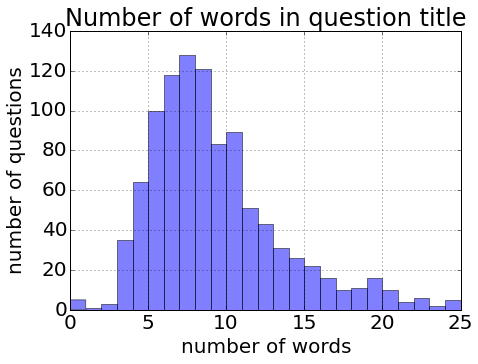

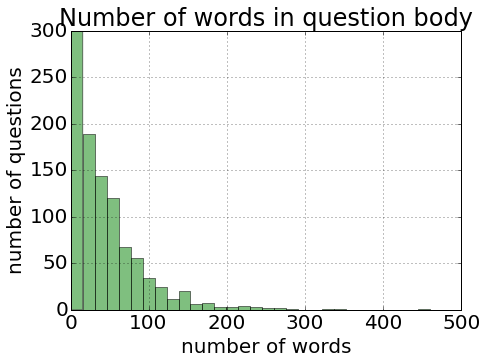

In [37]:
plt.figure(figsize=(7, 5))
word_count = []
with open(LIVEQA_DATA_PATH + "sample_data_from_orgs/title_words_count.txt", "r") as rec_input:
    for line in rec_input:
        word_count.append(int(line))
plt.hist(word_count, bins=25, color="blue", alpha=0.5)
plt.xlabel('number of words')
plt.ylabel('number of questions')
plt.title('Number of words in question title')
plt.legend()
plt.grid(True)
plt.show()

word_count = []
with open(LIVEQA_DATA_PATH + "sample_data_from_orgs/body_words_count.txt", "r") as rec_input:
    for line in rec_input:
        word_count.append(int(line))
plt.figure(figsize=(7, 5))
plt.hist(word_count, bins=30, color="green", alpha=0.5)
plt.xlabel('number of words')
plt.ylabel('number of questions')
plt.title('Number of words in question body')
plt.legend()
plt.grid(True)
plt.show()


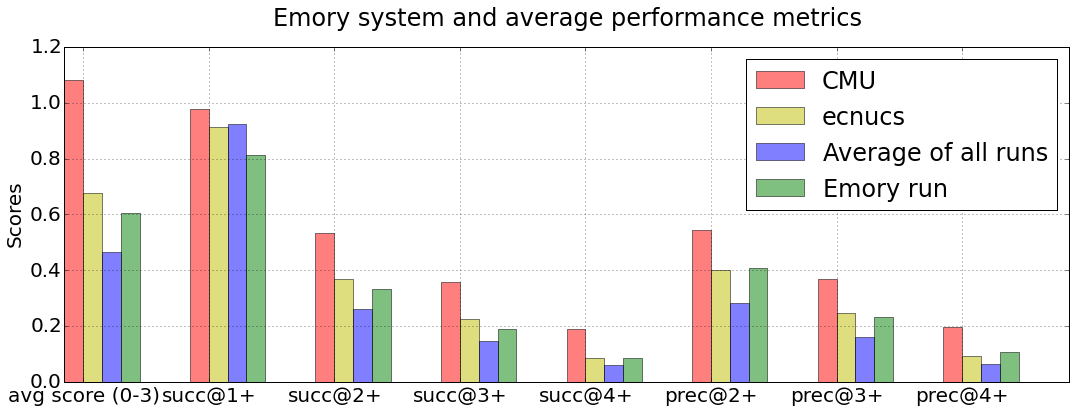

In [49]:
names = ["avg score (0-3)", "succ@1+", "succ@2+", "succ@3+", "succ@4+", "prec@2+", "prec@3+", "prec@4+"]
average = [0.465, 0.925, 0.262, 0.146, 0.060, 0.284, 0.159, 0.065]
emory = [0.605, 0.812, 0.332, 0.190, 0.086, 0.408, 0.233, 0.106]
cmu = [1.081, 1064.0/1087, 0.532, 0.359, 0.190, 0.543, 0.367, 0.195]
ecnucs = [0.677, 994.0/1087, 0.367, 0.224, 0.086, 0.401, 0.245, 0.094]

ind = np.arange(len(names))  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(18,6))
cmu_bars = ax.bar(ind, cmu, width, color='r', alpha=0.5)
ecnucs_bars = ax.bar(ind + width, ecnucs, width, color='y', alpha=0.5)
average_bars = ax.bar(ind + 2*width, average, width, color='b', alpha=0.5)
emory_bars = ax.bar(ind + 3*width, emory, width, color='g', alpha=0.5)


# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_xticks(ind + width)
ax.set_xticklabels(names)

ax.legend((cmu_bars[0], ecnucs_bars[0], average_bars[0], emory_bars[0]), ('CMU', 'ecnucs', 'Average of all runs', 'Emory run'))
plt.grid(True)
plt.title("Emory system and average performance metrics", y=1.05)
mpl.rcParams['font.size'] = 20.0
plt.show()


# Feature importances

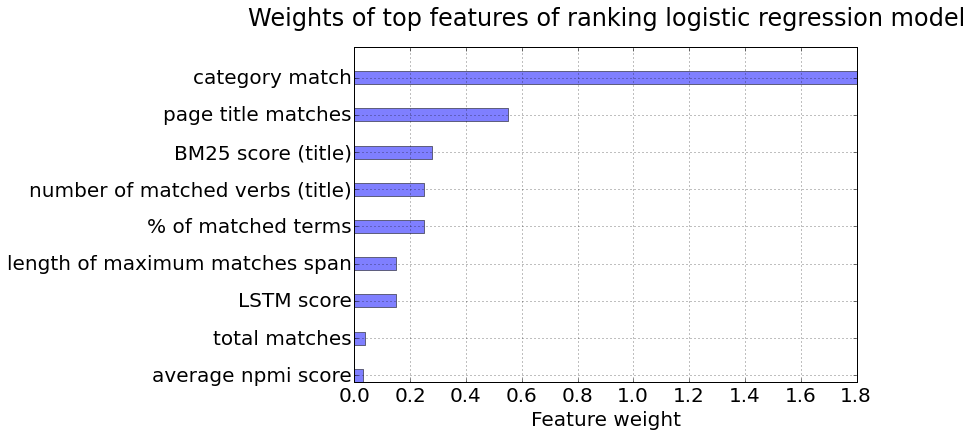

In [39]:
features = [("category match", 1.8), ("page title matches", 0.55), ("BM25 score (title)", 0.28), ("number of matched verbs (title)", 0.25), ("% of matched terms", 0.25),  ("length of maximum matches span", 0.15), ("LSTM score", 0.15), ("total matches", 0.04), ("average npmi score", 0.03)]
names = [rec[0] for rec in features]
vals = [rec[1] for rec in features]
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=(9,6))
average_bars = ax.barh(ind, vals[::-1], width, color='b', alpha=0.5)
# add some text for labels, title and axes ticks
ax.set_xlabel('Feature weight')
plt.yticks(ind + width/2, names[::-1], rotation=0, fontsize=20)
plt.grid(True)
plt.title("Weights of top features of ranking logistic regression model", y=1.05)
plt.show()

Home & Garden
YA 2.0 [34, 17]
Web 1.8 [45, 25]
Travel
YA 1.61111111111 [29, 18]
Web 1.09090909091 [24, 22]
Society & Culture
YA 3.0 [3, 1]
Web 1.0 [1, 1]
Arts & Humanities
YA 1.92857142857 [81, 42]
Web 1.65517241379 [48, 29]
Computers & Internet
YA 2.17857142857 [122, 56]
Web 1.5 [75, 50]
Family & Relationships
YA 3.0 [3, 1]
Web 1 [0, 0]
Games & Recreation
YA 3.0 [3, 1]
Web 1 [0, 0]
Local Businesses
YA 1.0 [1, 1]
Web 1 [0, 0]
Health
YA 1.93197278912 [284, 147]
Web 1.41428571429 [99, 70]
Pets
YA 1.91428571429 [67, 35]
Web 1.21875 [39, 32]
Beauty & Style
YA 2.16 [108, 50]
Web 1.68181818182 [37, 22]
Cars & Transportation
YA 1 [0, 0]
Web 1.0 [1, 1]
Sports
YA 1.875 [90, 48]
Web 1.69230769231 [44, 26]
Yahoo Products
YA 1.0 [1, 1]
Web 1 [0, 0]


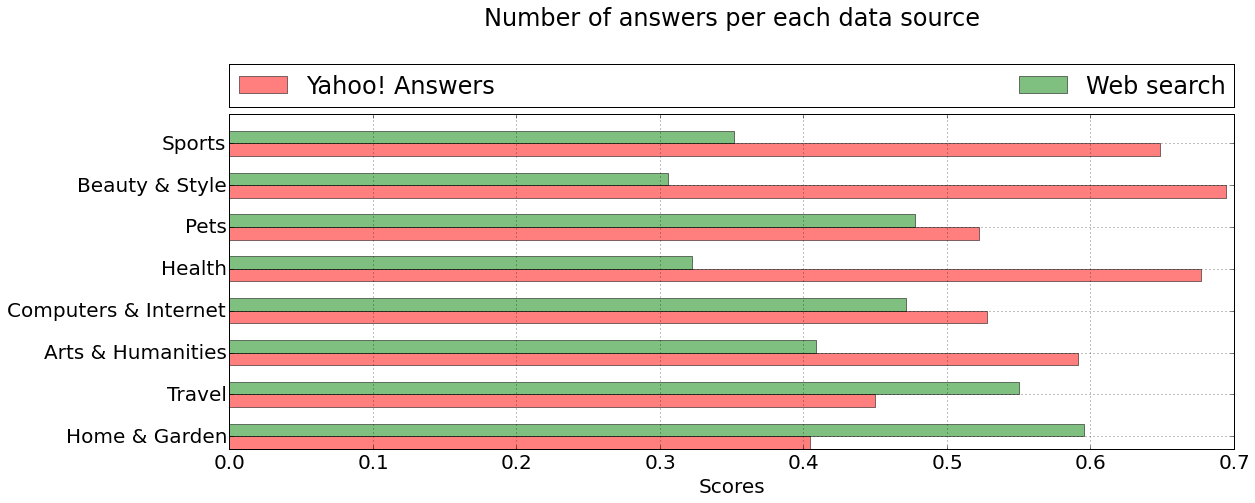

In [40]:
ya = dict()
web = dict()
for qid, result in judged_results.iteritems():
    answer_rec = answers[qid]
    if qid in questions:
        question = questions[qid]["TITLE"] + "\n" + questions[qid]["BODY"]
        category = questions[qid]["CATEGORY"].split(",")[0]
        if category not in ya:
            ya[category] = [0, 0]
            web[category] = [0, 0]
        url = answer_rec["RESOURCES"]
        answer = answer_rec["ANSWERCONTENT"]
        #if result["SCORE"] == "4":
        #    print("Question:\t", question, "\n")
        #    print("Answer:\t", answer, "\n", url, "\n\n")
        score = int(result["SCORE"])
        if url.find("answers.yahoo.com") != -1:
            ya[category][0] += score
            ya[category][1] += 1
        else:
            web[category][0] += score
            web[category][1] += 1

ya_avg = []
web_avg = []
categories = []
for category in ya.iterkeys():
    if (ya[category][1] + web[category][1]) > 5:
        ya_avg.append(1.0 * ya[category][1] / (ya[category][1] + web[category][1]))
        web_avg.append(1.0 * web[category][1] / (ya[category][1] + web[category][1]))
        categories.append(category)
        
    print(category)
    print("YA", 1.0 * ya[category][0] / ya[category][1] if ya[category][1] > 0 else 1, ya[category])
    print("Web", 1.0 * web[category][0] / web[category][1] if web[category][1] > 0 else 1, web[category])

    
ind = np.arange(len(categories))  # the x locations for the groups
width = 0.3       # the width of the bars
fig, ax = plt.subplots(figsize=(18,6))

average_bars = ax.barh(ind, ya_avg, width, color='r', alpha=0.5)
emory_bars = ax.barh(ind + width, web_avg, width, color='g', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_xlabel('Scores')
ax.set_yticks(ind + width)
ax.set_yticklabels(categories)

ax.legend((average_bars[0], emory_bars[0]), ('Yahoo! Answers', 'Web search'), bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.grid(True)
plt.title("Number of answers per each data source", y=1.25)
plt.show()

        